In [1]:
# Imports
import plotting_master as pm
import run

# Parameters
number_of_companies = 25
number_of_workers = 5 * number_of_companies 
salary_increase = 0.075
interest_rate_free = 0.0  # "variable" or float
mutation_magnitude = 0.05  # Float, "spread", "last_T"
prob_exponent = 1
# Bankruptcy: negative_money, cannot_pay_salary
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "constant"}
warmup_steps = 2500
time_steps = 5000 + warmup_steps 
seed = None

# Multiple m values
m_values = [1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10]
prob_exponent_values = [0, 1, 2, 4, 6, 8]
group_name_list_mutation = []
group_name_list_prob_expo = []
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, update_methods, time_steps, seed)
gname = create_data._get_group_name()


# Get group name list
# Mutation size
for m in m_values:
    create_data.mutation_magnitude = m
    group_name_list_mutation.append(create_data._get_group_name())
# # Reset m
create_data.mutation_magnitude = mutation_magnitude

# Prob exponent
for exponent in prob_exponent_values:
    create_data.prob_exponent = exponent
    group_name_list_prob_expo.append(create_data._get_group_name())
# Reset exponent
create_data.prob_exponent = prob_exponent

# Create plotting instance
plotter = pm.PlotMaster(gname)

### Store values

In [2]:
create_data.store_data_in_group()

Storing data in Steps5000_N25_W125_ds0.075_m0.05_wupdatelimited_rf0.0_ProbExpo1


100%|██████████| 4999/4999 [00:00<00:00, 9350.17it/s]


In [ ]:
create_data.repeated_m_runs(N_repeat=10, m_values=m_values)

In [ ]:
# Store data
for m in m_values:
    print("m = ", m)
    create_data.mutation_magnitude = m
    create_data.store_data_in_group()


In [ ]:
# Store Prob exponent data
for expo in prob_exponent_values:
    print("expo = ", expo) 
    create_data.prob_exponent = expo
    create_data.store_data_in_group()

### Plotting

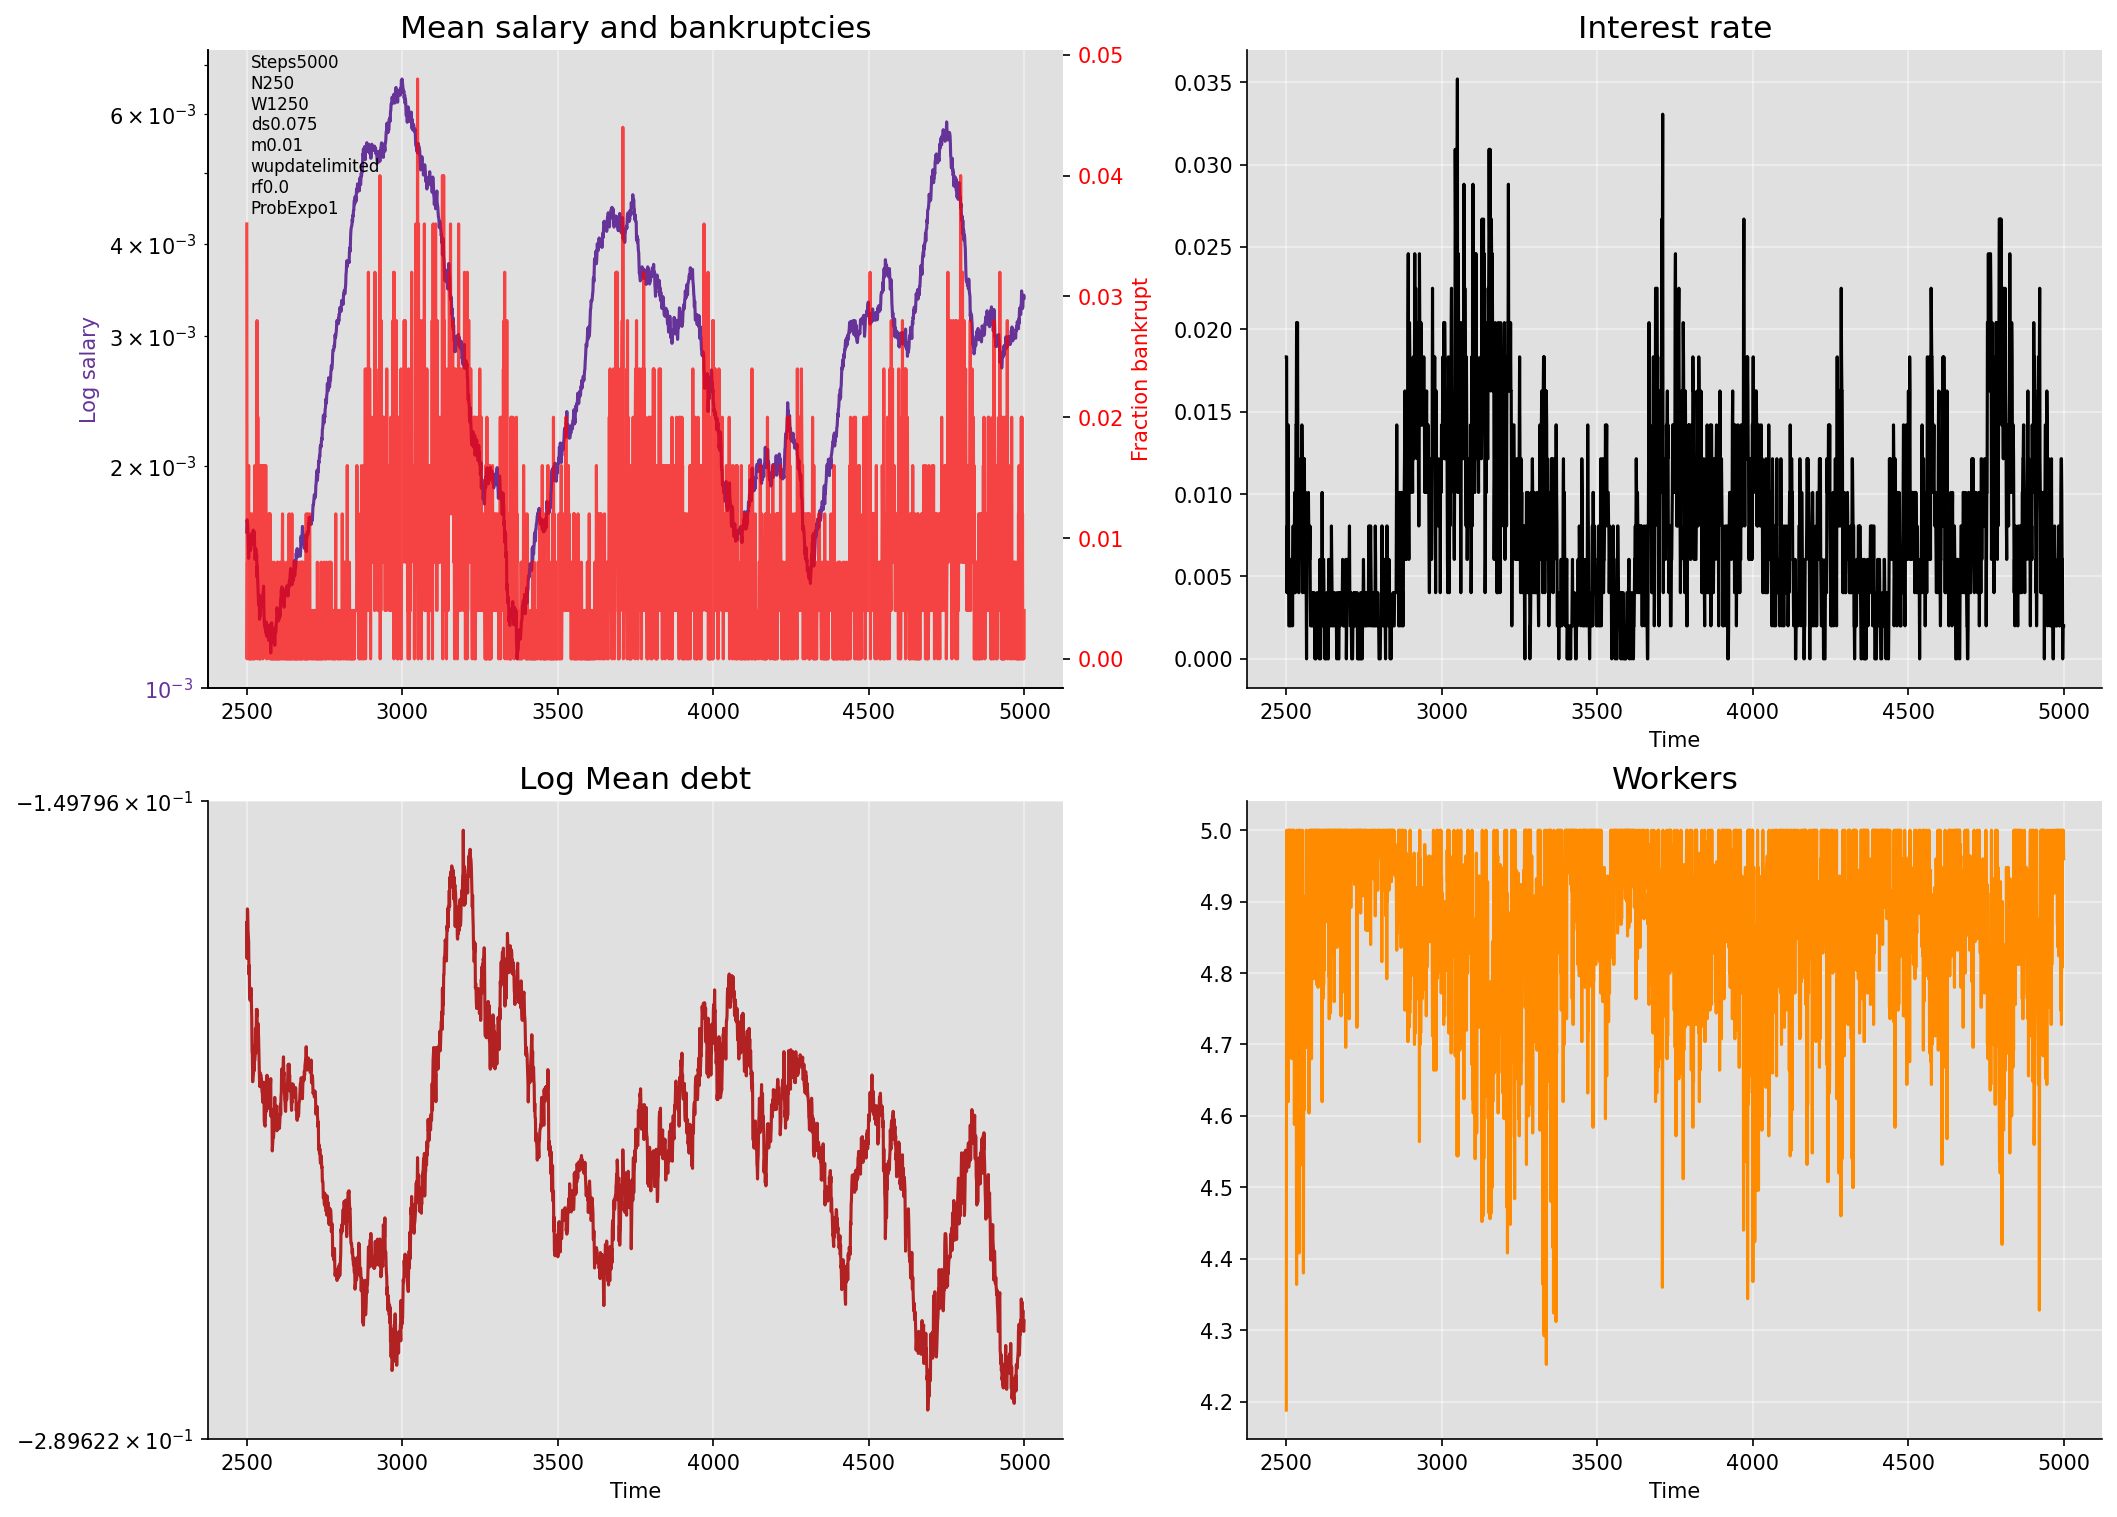

In [3]:
plotter.plot_collective()

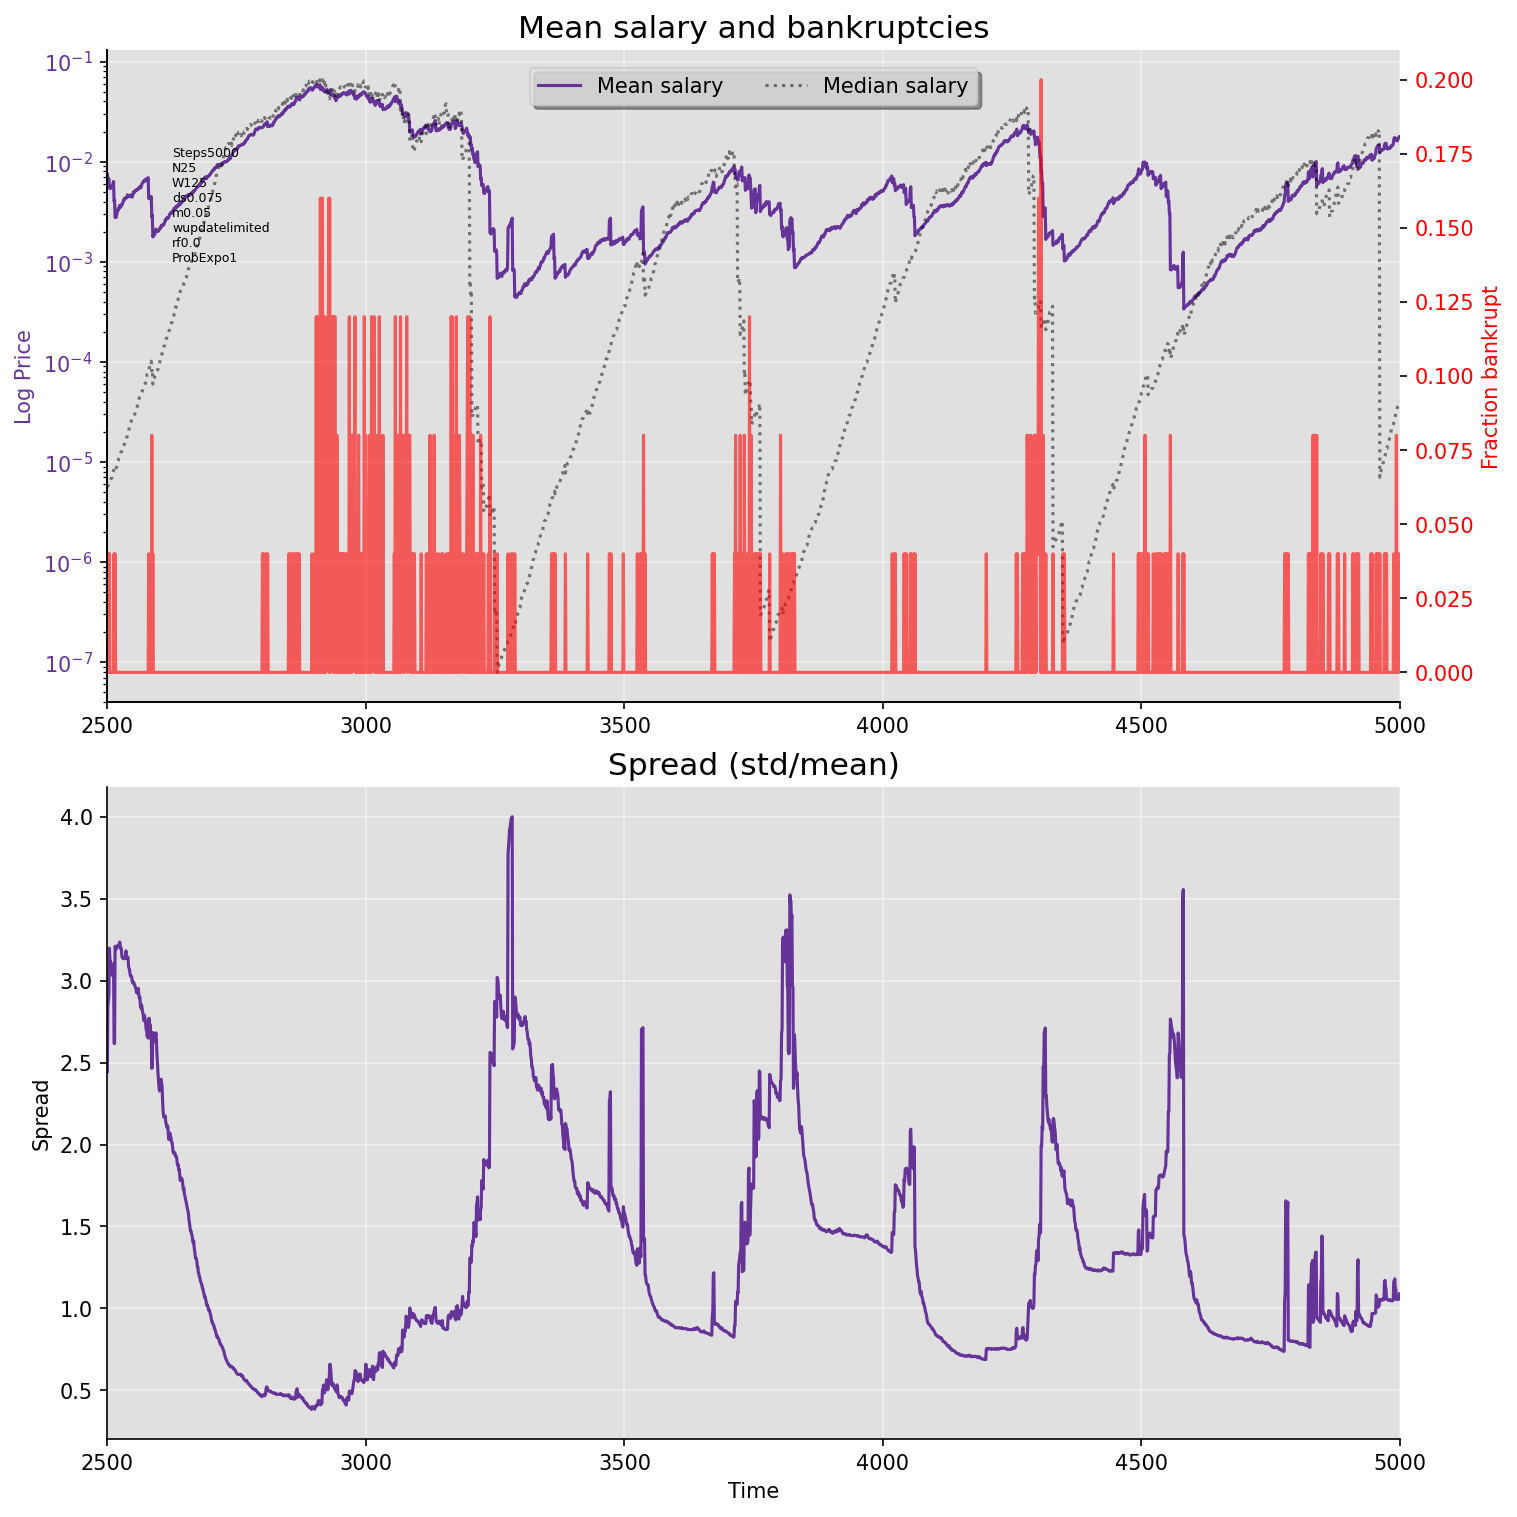

In [3]:
plotter.plot_salary()

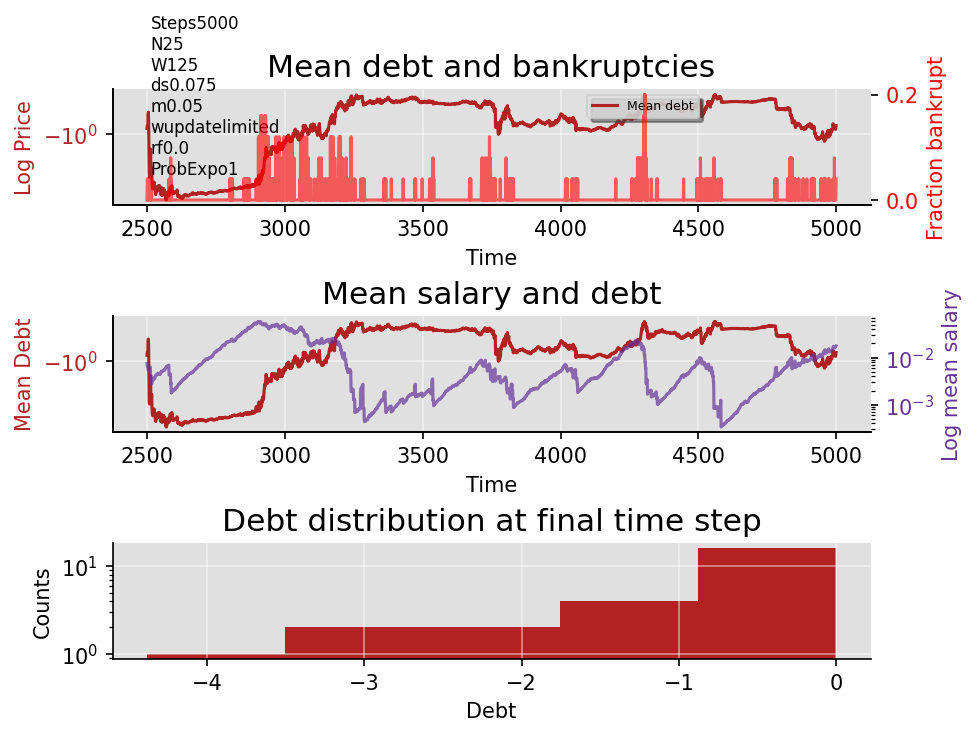

In [4]:
plotter.plot_debt()

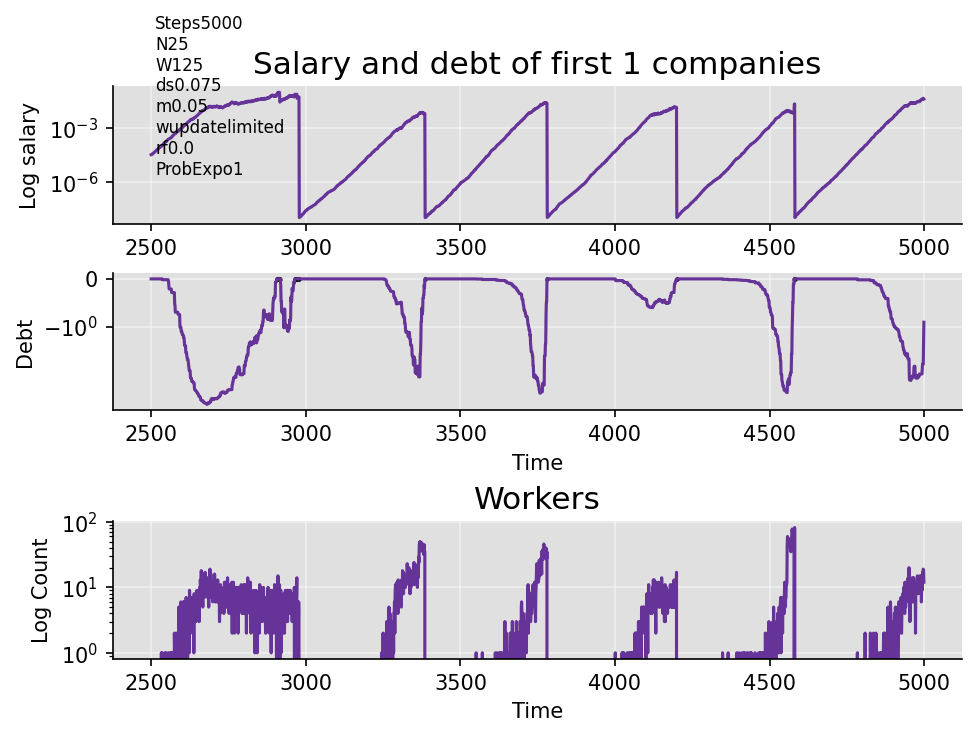

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
plotter.plot_single_companies(N_plot=1)

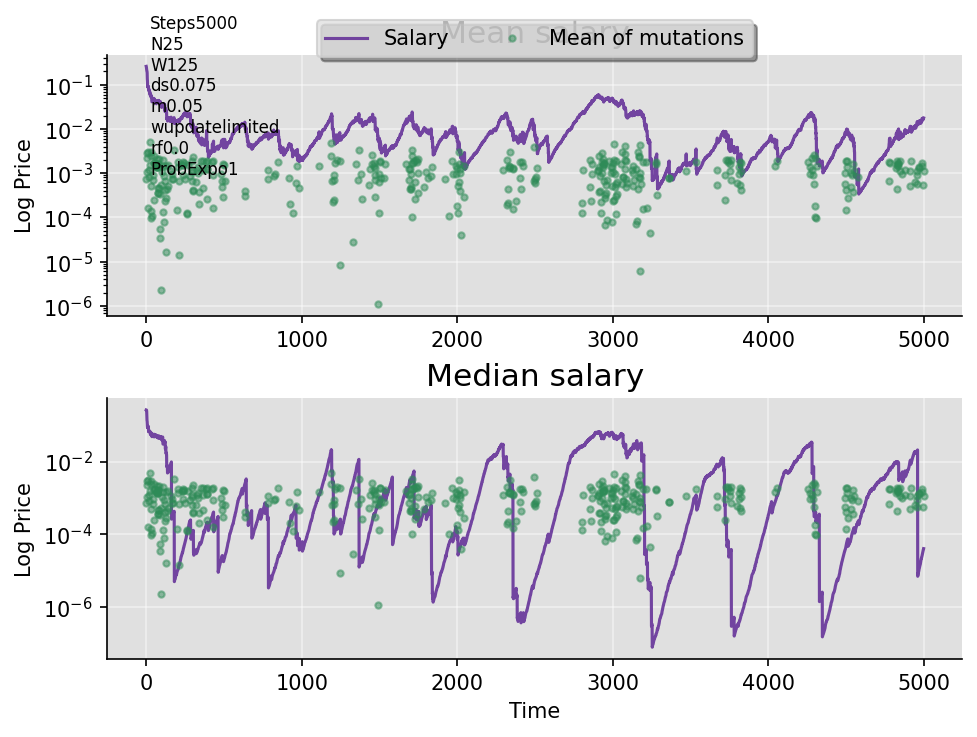

In [6]:
plotter.plot_mutations()

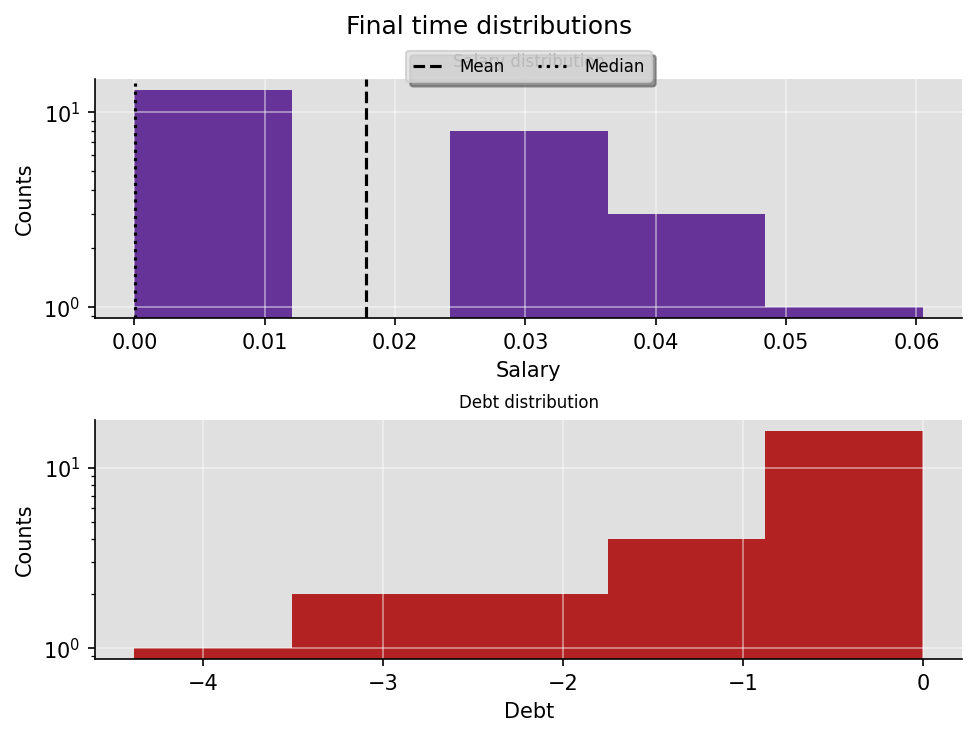

In [7]:
plotter.plot_salary_and_debt_distributions()

In [ ]:
plotter.plot_multiple_mutation_size(group_name_list_mutation)

In [ ]:
plotter.plot_multiple_prob_expo(group_name_list_prob_expo)

In [ ]:
plotter.plot_repeated_mutation_size()